In [71]:
import sagemaker
from sagemaker.predictor import RealTimePredictor
from PIL import Image
import numpy as np
import json
import os
import random
import matplotlib.pyplot as plt
import boto3

# Initialize endpoint URI
endpoint = 'unet-sagemaker-endpoint-3'

runtime_client = boto3.client('runtime.sagemaker')



    


In [72]:
# Choose random input image from test dataset
TEST_PATH = 'data/test/image/'
img_test_files = os.listdir(TEST_PATH)
index = random.randrange(len(img_test_files))
input_file = os.path.join(TEST_PATH,img_test_files[index])
print(input_file)


data/test/image/9.png


(1, 512, 512)


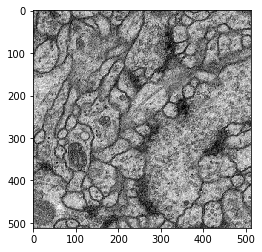

In [77]:
# Read image into memory
image = Image.open(input_file)
batch_size = 1
image = np.asarray(image)
plt.imshow(image, cmap="gray")

#image = image / 255
image = image.reshape(batch_size,image.shape[0],image.shape[1])
print(image.shape)
content_type = 'application/json'   

body = json.dumps({"instances": image.tolist()})


In [74]:
# Initialize Predictor and Inference
response = runtime_client.invoke_endpoint(EndpointName=endpoint, ContentType=content_type, Body=body)
print(type(response))
print(response)


<class 'dict'>
{'ResponseMetadata': {'RequestId': '4a278e9f-1c73-4cef-808b-00213933e2d6', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '4a278e9f-1c73-4cef-808b-00213933e2d6', 'x-amzn-invoked-production-variant': 'default-variant-name', 'date': 'Fri, 6 Nov 2020 16:10:51 GMT', 'content-type': 'application/json', 'content-length': '1178342'}, 'RetryAttempts': 0}, 'ContentType': 'application/json', 'InvokedProductionVariant': 'default-variant-name', 'Body': <botocore.response.StreamingBody object at 0x7f87af6acda0>}


In [75]:
result = json.loads(response['Body'].read().decode())



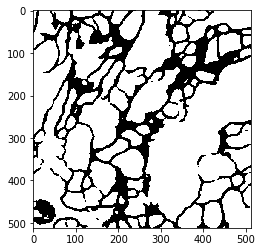

In [76]:
predictions = np.array(result)

plt.imshow(predictions, cmap="gray")

metadata


In [ ]:
# TO TRY  : aws sagemaker python sdk , import tensorflow model instead of using aws
# https://sagemaker.readthedocs.io/en/stable/overview.html#byo-model
